In [40]:
!uv add pandas
!uv add numpy
!uv add matplotlib
!uv add seaborn

Resolved 7 packages in 0.57ms
Audited 6 packages in 0.02ms
Resolved 7 packages in 0.62ms
Audited 6 packages in 0.02ms
Resolved 15 packages in 1.56s                                        
Prepared 2 packages in 963ms                                             
Installed 7 packages in 26ms                                
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.6
 + pillow==11.3.0
 + pyparsing==3.2.5
Resolved 16 packages in 280ms                                        
Installed 1 package in 8ms                                       ░░░░░░░░░░░░░░░░░░░░ [0/0] Installing wheels...                                 
 + seaborn==0.13.2


In [2]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('../src/data/raw/participants/train_candles.csv')
targets = df[["target_return_1d", "target_direction_1d", "target_return_20d", "target_direction_20d"]]
df = df.drop(columns = ["target_return_1d", "target_direction_1d", "target_return_20d", "target_direction_20d"])
df.head()

,open,close,high,low,volume,begin,ticker
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT


In [26]:
df["ticker"].unique()


array(['AFLT', 'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT',
       'MOEX', 'MTSS', 'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER',
       'SIBN', 'T', 'VTBR'], dtype=object)

In [27]:
df.isna().sum()

open      0
close     0
high      0
low       0
volume    0
begin     0
ticker    0
dtype: int64

In [28]:
df["price_change"] = [abs(df["open"][i]- df["close"][i]) for i in range(len(df))]
df

,open,close,high,low,volume,begin,ticker,price_change
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.20
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,0.38
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,0.84
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,0.80
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,1.12
...,...,...,...,...,...,...,...,...
23113,73.25,76.76,76.84,72.96,86278762,2025-04-11,VTBR,3.51
23114,77.00,78.17,78.28,76.91,13869580,2025-04-12,VTBR,1.17
23115,78.10,78.19,78.24,77.70,7366879,2025-04-13,VTBR,0.09
23116,78.20,75.50,78.29,75.09,62802061,2025-04-14,VTBR,2.70


In [29]:
df["absolute_change"] = [abs(df["low"][i]- df["high"][i]) for i in range(len(df))]
df

,open,close,high,low,volume,begin,ticker,price_change,absolute_change
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.20,2.04
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,0.38,3.72
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,0.84,2.08
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,0.80,2.58
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,1.12,2.68
...,...,...,...,...,...,...,...,...,...
23113,73.25,76.76,76.84,72.96,86278762,2025-04-11,VTBR,3.51,3.88
23114,77.00,78.17,78.28,76.91,13869580,2025-04-12,VTBR,1.17,1.37
23115,78.10,78.19,78.24,77.70,7366879,2025-04-13,VTBR,0.09,0.54
23116,78.20,75.50,78.29,75.09,62802061,2025-04-14,VTBR,2.70,3.20


In [32]:
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['vol_5d'] = df['log_return'].rolling(window=5).std()
df['vol_20d'] = df['log_return'].rolling(window=20).std()
df.head()

,open,close,high,low,volume,begin,ticker,price_change,absolute_change,log_return,vol_5d,vol_20d
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.20,2.04,NaN,NaN,NaN
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,0.38,3.72,0.004884,NaN,NaN
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,0.84,2.08,-0.011023,NaN,NaN
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,0.80,2.58,-0.007665,NaN,NaN
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,1.12,2.68,-0.015004,NaN,NaN


In [33]:
df.isna().sum()

open                0
close               0
high                0
low                 0
volume              0
begin               0
ticker              0
price_change        0
absolute_change     0
log_return          1
vol_5d              5
vol_20d            20
dtype: int64

In [44]:
corr_matrix = df[22:].drop(columns = ["ticker", "begin"]).corr()
corr_matrix

,open,close,high,low,volume,price_change,absolute_change,log_return,vol_5d,vol_20d
open,1.000000,0.999696,0.999812,0.999719,-0.088032,0.582594,0.689480,0.012480,-0.002752,-0.002902
close,0.999696,1.000000,0.999820,0.999793,-0.088050,0.581999,0.687876,0.016669,-0.002549,-0.002777
high,0.999812,0.999820,1.000000,0.999570,-0.088019,0.590909,0.697851,0.014524,-0.001583,-0.002243
low,0.999719,0.999793,0.999570,1.000000,-0.088056,0.571972,0.676544,0.015330,-0.003690,-0.003450
volume,-0.088032,-0.088050,-0.088019,-0.088056,1.000000,-0.049323,-0.059600,-0.004391,0.015329,0.007419
price_change,0.582594,0.581999,0.590909,0.571972,-0.049323,1.000000,0.868616,0.001359,0.049454,0.025075
absolute_change,0.689480,0.687876,0.697851,0.676544,-0.059600,0.868616,1.000000,-0.009688,0.050354,0.027936
log_return,0.012480,0.016669,0.014524,0.015330,-0.004391,0.001359,-0.009688,1.000000,-0.038536,-0.018047
vol_5d,-0.002752,-0.002549,-0.001583,-0.003690,0.015329,0.049454,0.050354,-0.038536,1.000000,0.500979
vol_20d,-0.002902,-0.002777,-0.002243,-0.003450,0.007419,0.025075,0.027936,-0.018047,0.500979,1.000000


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

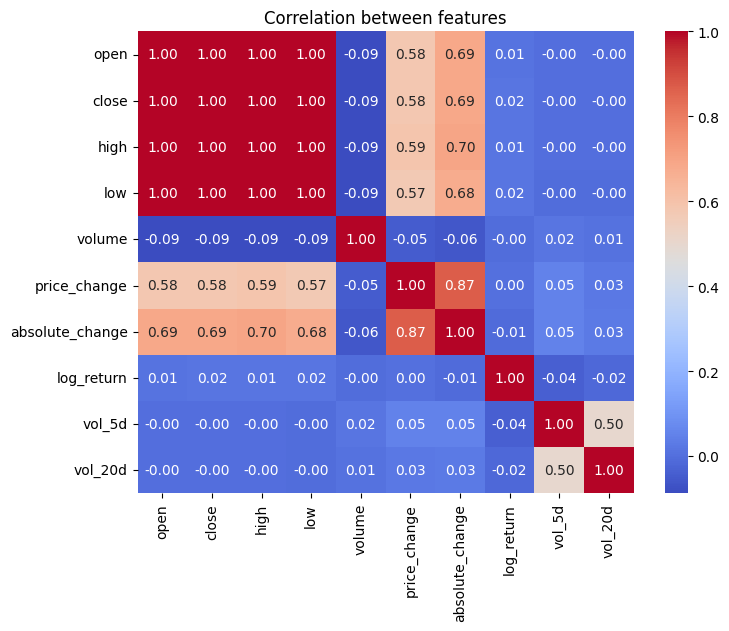

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between features")
plt.show()